In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

C:\Users\adarsha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

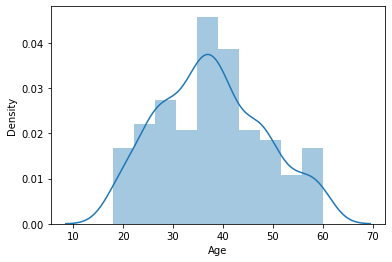

In [9]:
#4.data visualisation
sns.distplot(df["Age"])

In [10]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<AxesSubplot:>

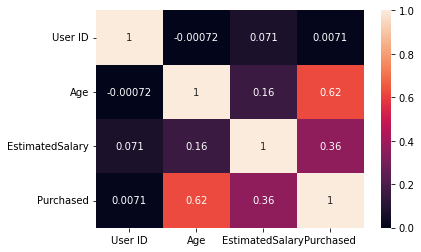

In [11]:
sns.heatmap(df.corr(),annot=True)

C:\Users\adarsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

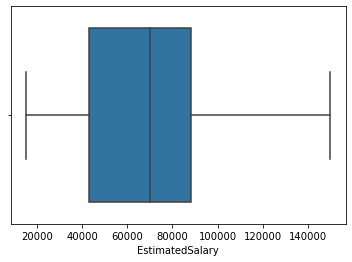

In [12]:
#outlier detection
sns.boxplot(df["EstimatedSalary"])

In [13]:
#splitting variables
x=df.iloc[:,1:4]
x.head()


,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [14]:
y=df.Purchased
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [15]:
#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.Gender=le.fit_transform(x.Gender)
x.head()


,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [16]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)

In [17]:
x_scaled.head()

,Gender,Age,EstimatedSalary
0,1.0,0.023810,0.029630
1,1.0,0.404762,0.037037
2,0.0,0.190476,0.207407
3,0.0,0.214286,0.311111
4,1.0,0.023810,0.451852


In [18]:
#SPLIT DAATA

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 3)
(80, 3)
(320,)
(80,)


# model building

In [20]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [21]:
model.fit(x_train,y_train)

GaussianNB()

In [22]:
pred=model.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [23]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64

In [24]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [25]:
model.predict(ms.transform([[0,27,57000]]))

array([0], dtype=int64)

In [31]:
x_train

,Gender,Age,EstimatedSalary
336,1.0,0.952381,0.955556
64,0.0,0.976190,0.503704
55,0.0,0.142857,0.296296
106,0.0,0.190476,0.148148
300,0.0,0.952381,0.170370
...,...,...,...
323,0.0,0.714286,0.111111
192,1.0,0.261905,0.207407
117,1.0,0.428571,0.274074
47,0.0,0.214286,0.288889


# Evaluation of model

In [32]:
#Acuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [33]:
accuracy_score(y_test,pred)

0.925

In [34]:
confusion_matrix(y_test,pred)

array([[56,  2],
       [ 4, 18]], dtype=int64)

In [36]:
pd.crosstab(y_test,pred)

col_0,0,1
Purchased,,
0,56,2
1,4,18


In [37]:
accuracy=(56+18)/80 #...based on above confusion matrix
accuracy

0.925

In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.90      0.82      0.86        22

    accuracy                           0.93        80
   macro avg       0.92      0.89      0.90        80
weighted avg       0.92      0.93      0.92        80



In [43]:
probability=model.predict_proba(x_test)[:,1]
probability

array([0.09594722, 0.17250905, 0.13319495, 0.0867453 , 0.11006422,
       0.0397755 , 0.10289474, 0.96001318, 0.01138736, 0.47552608,
       0.04166895, 0.038873  , 0.12693701, 0.2483256 , 0.02202044,
       0.54027453, 0.18819633, 0.01840984, 0.99638606, 0.1255031 ,
       0.10968601, 0.9955861 , 0.26427056, 0.85586364, 0.02219279,
       0.99588402, 0.08729702, 0.06352284, 0.16436085, 0.14823868,
       0.02760159, 0.19908161, 0.88479016, 0.12527323, 0.01797509,
       0.00733794, 0.02379313, 0.09507891, 0.06537723, 0.63950154,
       0.06473084, 0.22571331, 0.06704559, 0.13223981, 0.84765854,
       0.03447917, 0.24195669, 0.89489814, 0.02680129, 0.75685276,
       0.99518415, 0.12139484, 0.11494184, 0.53134451, 0.97171174,
       0.41064893, 0.08621971, 0.05000663, 0.62237315, 0.02217703,
       0.0894389 , 0.93219677, 0.01318146, 0.35014257, 0.01326984,
       0.96534617, 0.05390512, 0.02803671, 0.19356393, 0.36455302,
       0.96759435, 0.1687751 , 0.01789066, 0.46767699, 0.06762

In [44]:
#roc curve
fpr,tpr,thresholds=roc_curve(y_test,probability)

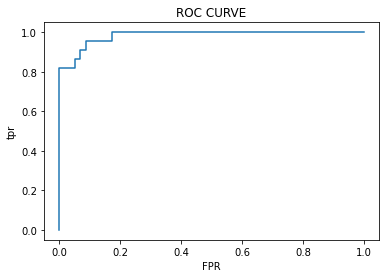

In [45]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('tpr')
plt.title('ROC CURVE')
plt.show()

more formulas are not noted about the presicion recall,... look at the notebook by mam